## Salary Prediction

Given a dataset which captures gross salary from july 2013 to june 2014 and includes only those employees who were employed on june 2014. Predict salaries for employees in baltimore.

# Outline
1. Import Dataset
2. Data cleaning and preparation
3. Exploratory Data Analysis
4. Feature Engineering
5. Train Test split
6. Model Building
7. Model Evaluation

In [1]:
## Import libraries for analysis
import numpy as np
import pandas as pd

## Import libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## Import libraries for train test split
from sklearn.model_selection import train_test_split

## Import library for scaling
from sklearn.preprocessing import StandardScaler

## Import Library for model building
from sklearn.linear_model import LinearRegression

## Import Warnings
import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

The data set is in the csv format and can be imported using read_csv method available in pandas library

In [2]:
salary=pd.read_csv(r"D:\\ML Data\\salary_prediction_train.csv")

In [3]:
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


## Data cleaning and Preparation

In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


There are 18981 rows in the data set, there are 7 columns in the data set and all are of type object

It is always a good practice to work on the copy of datasets instead of working on the original data itself

In [5]:
salary_cpy=salary.copy()

In [6]:
salary_cpy.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [7]:
# Since name has a leading space therefore we are removing it.
salary_cpy.columns=salary_cpy.columns.str.strip()

In [8]:
salary_cpy.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [9]:
# Check null values
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [10]:
salary_cpy=salary_cpy.dropna(subset=['HireDate'])

In [11]:
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64

In [12]:
## Lets drop the gross pay columns
salary_cpy=salary_cpy.drop('GrossPay', axis=1)

In [13]:
salary_cpy.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

In [14]:
salary_cpy.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02525      1
W02400      1
A64005      1
W02666      1
W02339      1
Name: AgencyID, Length: 1177, dtype: int64

There are 1177 agencies. As per general understanding that AgencyID represents Agency, so we should have the same number of agencies as well but after validating it seems one agency is having multiple agency IDs

In [15]:
## Value counts for agencies
salary_cpy.Agency.value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: Agency, Length: 65, dtype: int64

In [16]:
salary_cpy.JobTitle.value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
PUBLIC INFORMATION OFFICER SAO       1
STREET MASON                         1
DESIGN PLANNER I                     1
FUEL SYSTEMS SPECIALIST              1
Research Analyst II                  1
Name: JobTitle, Length: 1073, dtype: int64

In [17]:
## value_counts on HireDate
salary_cpy.HireDate.value_counts()

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
02/13/2009       1
08/12/1993       1
02/09/1998       1
05/06/1980       1
10/15/1979       1
Name: HireDate, Length: 4737, dtype: int64

In [18]:
## Removing $ from Annual Salary and converting it into float
salary_cpy['AnnualSalary']= salary_cpy['AnnualSalary'].apply(lambda x: (float)(str(x)[1:]))

In [19]:
salary_cpy.AnnualSalary.value_counts()

11310.0    4811
20800.0     325
29245.0     196
43999.0     169
44773.0     162
           ... 
58227.0       1
41704.0       1
44700.0       1
43000.0       1
900.0         1
Name: AnnualSalary, Length: 1590, dtype: int64

In [20]:
salary_cpy['HireDay']=salary_cpy['HireDate'].apply(lambda x: (int)(str(x[3:5])))
salary_cpy['HireMonth']=salary_cpy['HireDate'].apply(lambda x: (int)(str(x[0:2])))
salary_cpy['HireYear']=salary_cpy['HireDate'].apply(lambda x: (int)(str(x[6:])))

In [21]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013


In [22]:
## Trimming all categorical columns to make sure there are no leading and trailing spaces and no double spaces between words

In [23]:
salary_cpy['JobTitle']=salary_cpy['JobTitle'].apply(lambda x: str(x).strip().replace("  "," "))
salary_cpy['AgencyID']=salary_cpy['AgencyID'].apply(lambda x: str(x).strip().replace("  "," "))
salary_cpy['Agency']=salary_cpy['Agency'].apply(lambda x: str(x).strip().replace("  "," "))

In [24]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013


In [25]:
## It can be seen that some of the job titles are in upper case, some with lower and a mix of both which might affect our 
##analysis, so converting them to uppercase and also converting agency id and agency

In [26]:
salary_cpy['JobTitle']=salary_cpy['JobTitle'].apply(lambda x: str(x).upper())
salary_cpy['AgencyID']=salary_cpy['AgencyID'].apply(lambda x: str(x).upper())
salary_cpy['Agency']=salary_cpy['Agency'].apply(lambda x: str(x).upper())

In [27]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,YOUTH SUMMER,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",FACILITIES/OFFICE SERVICES II,A03031,OED-EMPLOYMENT DEV,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,STATES ATTORNEYS OFFICE,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-HEALTH DEPARTMENT,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,POLICE DEPARTMENT,07/24/2013,43999.0,24,7,2013


The last thing left in the data pre processing is outlier treatment. So lets create a box plot and check for them

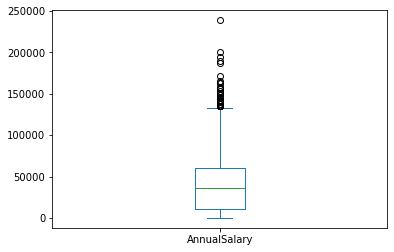

In [28]:
salary_cpy.AnnualSalary.plot.box()
plt.show()

In [29]:
salary_cpy.shape

(18911, 9)

1. We can say there are few salaries which are way far from other salaries.
2. They might affect our predictions and hence we have to remove them

In [30]:
## summary stats of annual salary
salary_cpy.AnnualSalary.describe()

count     18911.000000
mean      39660.421889
std       25163.465942
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

Delete rows whose annual salary>140000 according to box plot

In [31]:
salary_cpy=salary_cpy[salary_cpy['AnnualSalary']<140000]

In [32]:
salary_cpy.shape

(18885, 9)

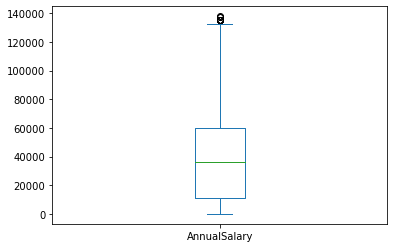

In [33]:
salary_cpy.AnnualSalary.plot.box()
plt.show()

In [34]:
## Now that we are done with the data preparation we can move to the next step that is exploratory data analysis

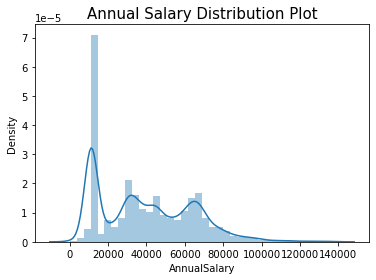

In [35]:
## We will first check the distribution of annual salary by a distplot
sns.distplot(salary_cpy.AnnualSalary)
plt.title("Annual Salary Distribution Plot", fontsize=15)
plt.show()

The data is distributed very randomly and there seems to be not many people with salary more than 100000

Let us check jons for which people are hired the most. For this we will be creating a barplot

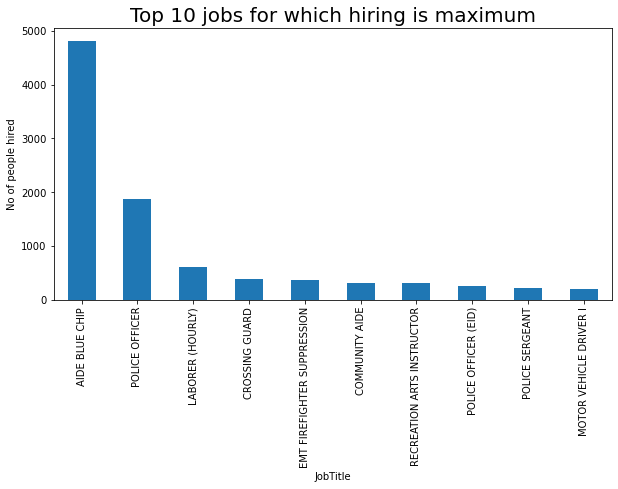

In [36]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("No of people hired")
plt.title("Top 10 jobs for which hiring is maximum", fontsize=20)
plt.show()

This plot shows more number of people were hired for aide blue chip followed by job of police officers, all other job titles
than these two have less than 1000 workers

Let us check the top 10 highest paying jobs

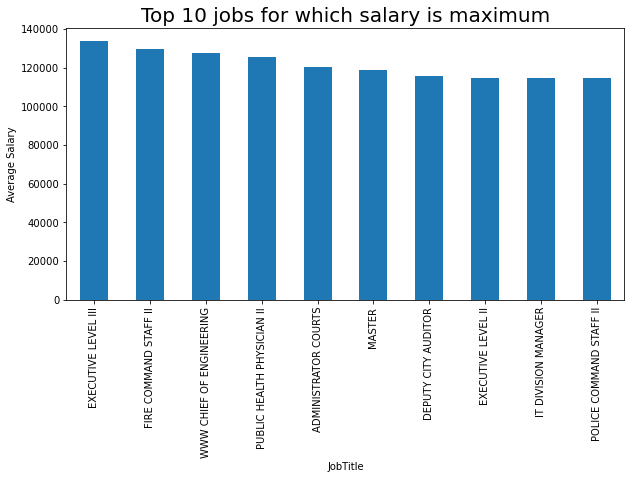

In [37]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("Average Salary")
plt.title("Top 10 jobs for which salary is maximum", fontsize=20)
plt.show()

Number of jobs whose pay is more than total average salary

In [38]:
# Find total average salary
mean_sal=salary_cpy.AnnualSalary.mean()

# Number of jobs paying more than mean salary
good_paying_jobs=salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()
good_paying_jobs[good_paying_jobs.AnnualSalary>mean_sal]['JobTitle'].count()

797

In [39]:
good_paying_jobs

,JobTitle,AnnualSalary
0,911 LEAD OPERATOR,47886.000000
1,911 OPERATOR,42835.743590
2,911 OPERATOR SUPERVISOR,54797.500000
3,ACCOUNT EXECUTIVE,42960.000000
4,ACCOUNTANT I,46316.642857
...,...,...
1049,ZONING ADMINISTRATOR,82100.000000
1050,ZONING APPEALS ADVISOR BMZA,59274.000000
1051,ZONING ENFORCEMENT OFFICER,62000.000000
1052,ZONING EXAMINER I,43674.000000


Let us check the top 10 agencies and top 10 agency ids with highest number of employees

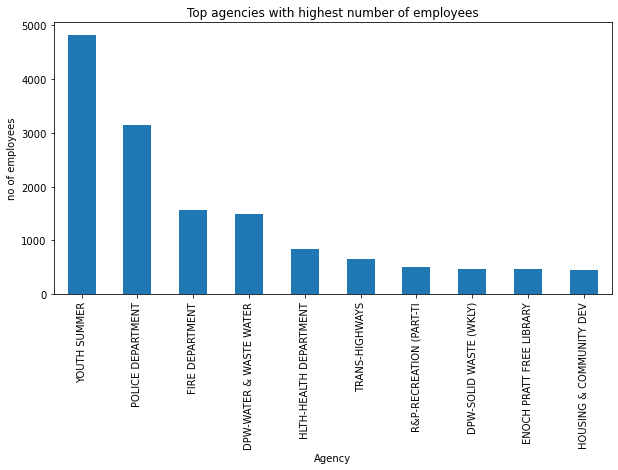

In [40]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['Agency'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('no of employees')
plt.title('Top agencies with highest number of employees')
plt.show()

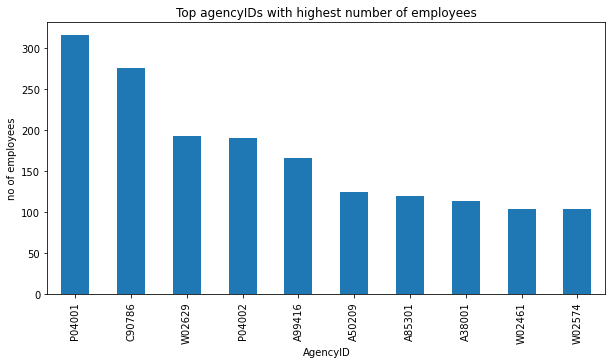

In [41]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['AgencyID'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('no of employees')
plt.title('Top agencyIDs with highest number of employees')
plt.show()

Let us check people hired in which year have lowest salaries. This is to check if as the hire year increases wheter the salary
increases or decreases because people have higher experience should have higher salary

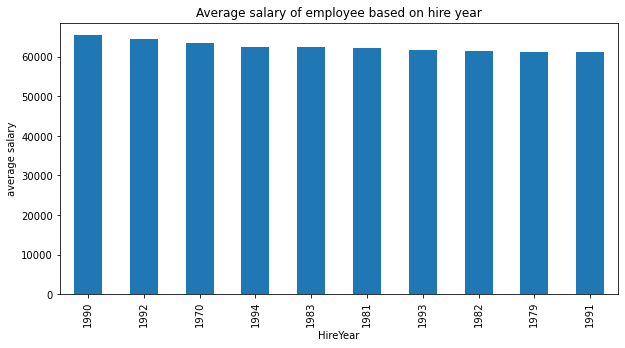

In [42]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireYear'])['AnnualSalary'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("average salary")
plt.title("Average salary of employee based on hire year")
plt.show()

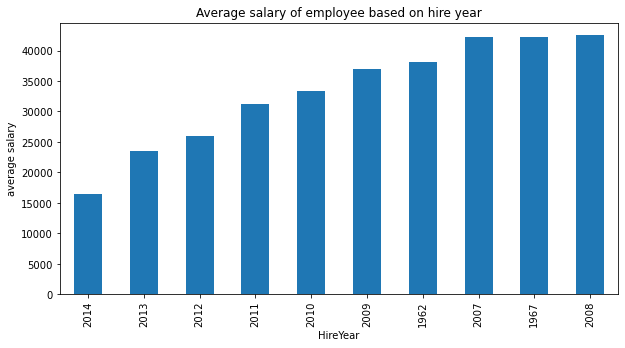

In [43]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireYear'])['AnnualSalary'].mean().sort_values().head(10).plot.bar()
plt.ylabel("average salary")
plt.title("Average salary of employee based on hire year")
plt.show()

The trend above suggests that the salary of the employees increases with experience in the company. So now lets calculate experience in days with agency

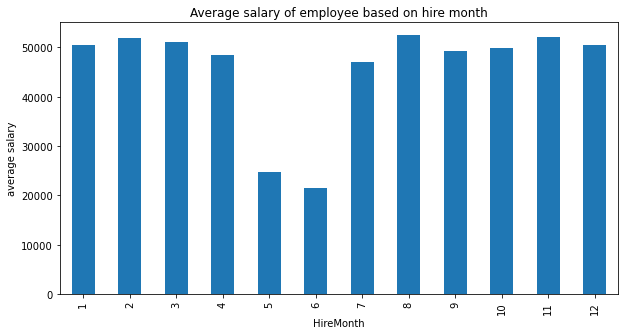

In [44]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['AnnualSalary'].mean().plot.bar()
plt.ylabel("average salary")
plt.title("Average salary of employee based on hire month")
plt.show()

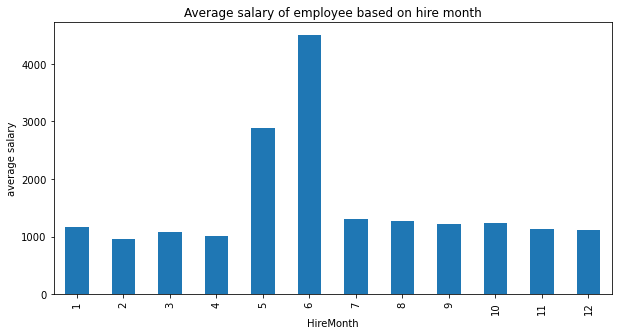

In [45]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['Name'].count().plot.bar()
plt.ylabel("average salary")
plt.title("Average salary of employee based on hire month")
plt.show()

We can conclude that more employees are hired in month of may and june but they have relatively lower average salaries.

<Figure size 1080x1440 with 0 Axes>

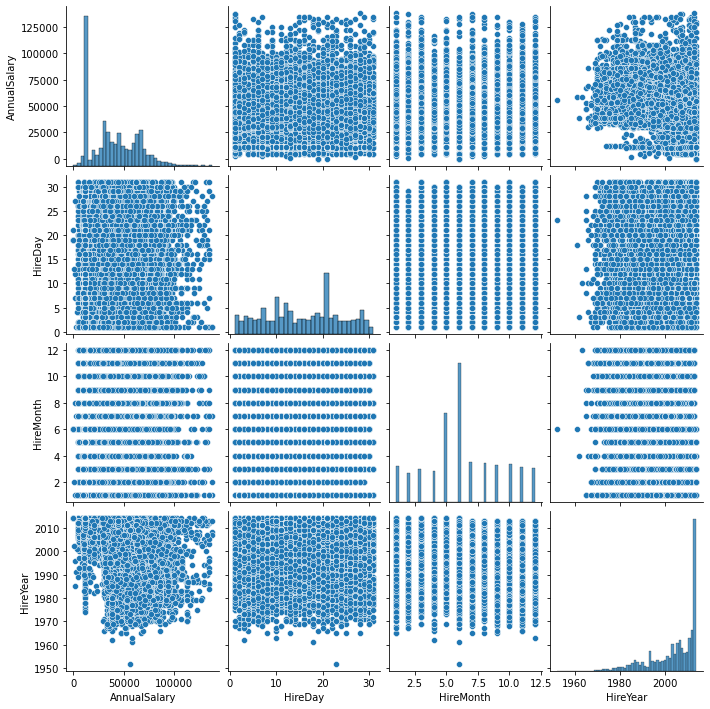

In [46]:
## lets check if there is any relation between any of the numerical variable using pairplot
plt.figure(figsize=(15,20))
sns.pairplot(salary_cpy)
plt.show()

<AxesSubplot:>

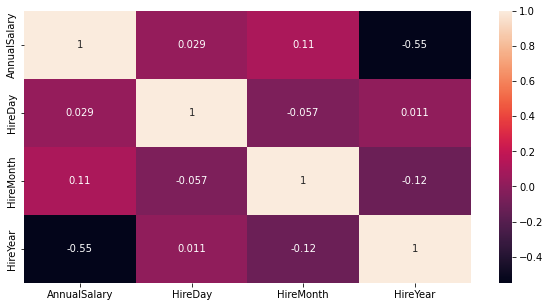

In [47]:
plt.figure(figsize=(10,5))
sns.heatmap(salary_cpy.corr(), annot=True)

## Feature Engineering

In [48]:
# Create a copy of the dataframe
salary_master=salary_cpy.copy()

In [49]:
## Apply mean encoding for job title
mean_job=salary_master.groupby('JobTitle')['AnnualSalary'].mean()
salary_master['JobTitle']=salary_master['JobTitle'].map(mean_job)
salary_master['JobTitle']

0        11313.967200
1        47443.500000
2        69750.666667
3        57940.000000
4        44531.160494
             ...     
18976    11313.967200
18977    11313.967200
18978    44531.160494
18979    60588.139335
18980    53368.428571
Name: JobTitle, Length: 18885, dtype: float64

In [50]:
## Apply mean encoding for job title
mean_agency=salary_master.groupby('Agency')['AnnualSalary'].mean()
salary_master['Agency']=salary_master['Agency'].map(mean_agency)
salary_master['Agency']

0        11313.967200
1        51495.424242
2        64874.560224
3        39980.900360
4        61481.005417
             ...     
18976    11313.967200
18977    11313.967200
18978    61481.005417
18979    61481.005417
18980    42565.513078
Name: Agency, Length: 18885, dtype: float64

In [51]:
## Apply mean encoding for job title
mean_agencyid=salary_master.groupby('AgencyID')['AnnualSalary'].mean()
salary_master['AgencyID']=salary_master['AgencyID'].map(mean_agencyid)
salary_master['AgencyID']

0        11310.000000
1        46667.000000
2        65926.133333
3        48071.851064
4        44012.307229
             ...     
18976    11310.000000
18977    11310.000000
18978    44012.307229
18979    60203.340426
18980    42407.562500
Name: AgencyID, Length: 18885, dtype: float64

In [52]:
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18885 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18885 non-null  object 
 1   JobTitle      18885 non-null  float64
 2   AgencyID      18885 non-null  float64
 3   Agency        18885 non-null  float64
 4   HireDate      18885 non-null  object 
 5   AnnualSalary  18885 non-null  float64
 6   HireDay       18885 non-null  int64  
 7   HireMonth     18885 non-null  int64  
 8   HireYear      18885 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.9+ MB


In [53]:
# Drop name and hire date column
salary_master=salary_master.drop(['HireDate','Name'],axis=1)
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18885 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      18885 non-null  float64
 1   AgencyID      18885 non-null  float64
 2   Agency        18885 non-null  float64
 3   AnnualSalary  18885 non-null  float64
 4   HireDay       18885 non-null  int64  
 5   HireMonth     18885 non-null  int64  
 6   HireYear      18885 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.7 MB


# Train-Test-Split

In [54]:
# Split Data into Train and test
salary_train, salary_test= train_test_split(salary_master, train_size=0.7, random_state=10)

In [55]:
print(salary_train.shape)
print(salary_test.shape)

(13219, 7)
(5666, 7)


In [56]:
# divide train set into dependent and independent variables
y_train=salary_train.pop("AnnualSalary")
X_train=salary_train

# Divide the test set into dependent and independent variables
y_test=salary_test.pop("AnnualSalary")
X_test=salary_test

In [57]:
X_train

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
2110,21570.423841,21474.446429,31494.602740,26,3,2007
7529,11313.967200,11310.000000,11313.967200,16,6,2014
15366,11313.967200,11310.000000,11313.967200,10,6,2013
3237,11313.967200,11310.000000,11313.967200,11,6,2009
16659,11313.967200,11310.000000,11313.967200,19,6,2014
...,...,...,...,...,...,...
9453,11313.967200,11310.000000,11313.967200,21,5,2014
7371,29925.666667,33754.400000,31594.490526,4,3,2002
17822,34098.128205,38263.434783,31494.602740,27,5,1999
7373,42275.081081,62661.900000,62661.900000,6,10,1969


# Feature Scaling

In [58]:
scaler=StandardScaler()
X_train[X_train.columns]=scaler.fit_transform(X_train[X_train.columns])
X_train.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,1.321900e+04,1.321900e+04,1.321900e+04,1.321900e+04,1.321900e+04,1.321900e+04
mean,1.054960e-16,8.526730e-16,2.849421e-16,1.531228e-16,-8.850541e-17,-7.982991e-15
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.546632e+00,-1.691969e+00,-1.397343e+00,-1.763380e+00,-1.822288e+00,-4.138882e+00
25%,-1.162446e+00,-1.272054e+00,-1.345816e+00,-8.086782e-01,-4.642147e-01,-5.827611e-01
50%,-1.457188e-01,9.319493e-02,1.459947e-01,2.668601e-02,-1.246964e-01,2.822413e-01
75%,8.700324e-01,9.033706e-01,1.048937e+00,7.427125e-01,8.938587e-01,8.589095e-01
max,3.889902e+00,2.886953e+00,1.959063e+00,1.816752e+00,1.912414e+00,9.550209e-01


In [59]:
X_train

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
2110,-0.739384,-0.813601,-0.382481,1.220063,-1.143251,0.282241
7529,-1.162446,-1.272054,-1.345816,0.026686,-0.124696,0.955021
15366,-1.162446,-1.272054,-1.345816,-0.689340,-0.124696,0.858910
3237,-1.162446,-1.272054,-1.345816,-0.570003,-0.124696,0.474464
16659,-1.162446,-1.272054,-1.345816,0.384699,-0.124696,0.955021
...,...,...,...,...,...,...
9453,-1.162446,-1.272054,-1.345816,0.623375,-0.464215,0.955021
7371,-0.394744,-0.259730,-0.377713,-1.405367,-1.143251,-0.198316
17822,-0.222637,-0.056356,-0.382481,1.339401,-0.464215,-0.486650
7373,0.114649,1.044104,1.105307,-1.166691,1.233377,-3.369991


In [60]:
X_test[X_test.columns]=scaler.fit_transform(X_test[X_test.columns])

# Model Building
we are building linear regression model

In [61]:
lr=LinearRegression()
salary_reg=lr.fit(X_train,y_train)

In [62]:
salary_reg.score(X_train,y_train)

0.9652498067695456

In [63]:
salary_reg.score(X_test,y_test)

0.9647181159099966

Even though our model performs on train data that doesnt mean that our model is good, the model should perform equally well on the test data only then a model is considered a good model. If the model is just performing good on the training data and not on the test data, then we can say there is overfitting and if the model is performing good on the test data and bad on the training data, then there is underfitting which can be fixed by regularization

In [65]:
print(salary_reg.coef_)
print(salary_reg.intercept_)

[22107.57351879  2772.01552827 -1638.49731197   -78.87693955
  -103.80442772 -2104.19216623]
39505.76539904681


In [68]:
y_pred=salary_reg.predict(X_test)

In [70]:
y_pred

array([58753.65393119, 10473.55438818, 10575.79726306, ...,
       57568.54532912, 65333.00342629, 11179.25048703])

In [69]:
y_test

9797     59409.0
4541     11310.0
2860     11310.0
8139     66231.0
2876     40303.0
          ...   
11213    40954.0
3366     69900.0
11606    57900.0
14382    65480.0
394      11310.0
Name: AnnualSalary, Length: 5666, dtype: float64